In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load workout dataset
workout_df = pd.read_csv('data/workout.csv')

In [3]:
# Explore dataset and check datatypes

In [4]:
workout_df.head()

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


In [5]:
workout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month              61 non-null     object
 1   workout_worldwide  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


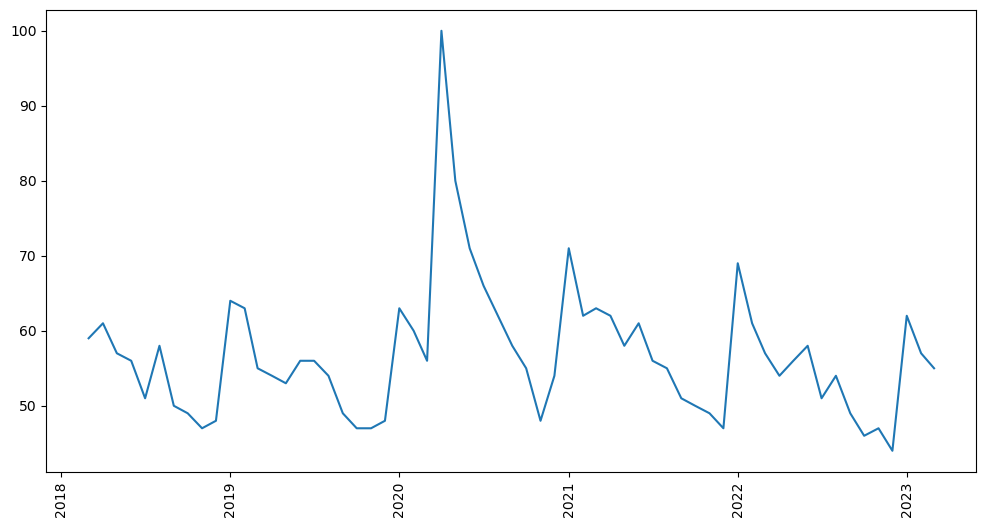

In [8]:
# Visualise popularity of keyword 'workout'
plt.figure(figsize=(12, 6))
plt.plot(workout_df["month"], workout_df["workout_worldwide"])
plt.xticks(rotation=90)
plt.show()

In [6]:
# Convert month to datetime and extract year
workout_df['month'] = pd.to_datetime(workout_df['month'])
workout_df['year'] = workout_df['month'].dt.year

In [11]:
# Extract year in which the keyword 'workout' was most popular
workout_df_year = workout_df.groupby('year')['workout_worldwide'].sum().sort_values(ascending=False).index[0]
print(workout_df_year)

2020


In [12]:
# Load keywords dataset
keywords_df = pd.read_csv('data/three_keywords.csv')

In [13]:
# Explore dataset and check datatypes 
keywords_df.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


In [14]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   month                   61 non-null     object
 1   home_workout_worldwide  61 non-null     int64 
 2   gym_workout_worldwide   61 non-null     int64 
 3   home_gym_worldwide      61 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ KB


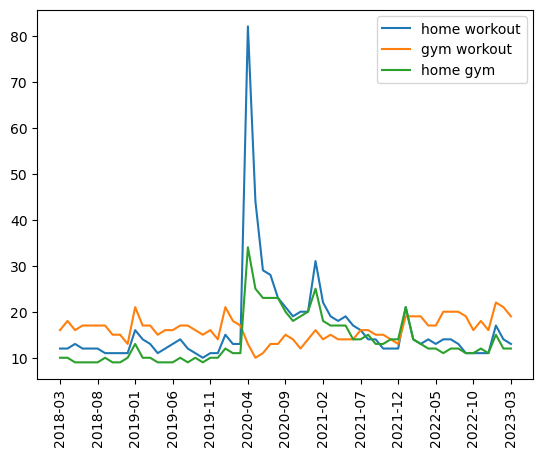

In [19]:
# Visualise popularity of keywords 'home workout', 'gym workout', and 'home gym'
plt.plot(keywords_df["month"], keywords_df["home_workout_worldwide"], label="home workout")
plt.plot(keywords_df["month"], keywords_df["gym_workout_worldwide"], label="gym workout")
plt.plot(keywords_df["month"], keywords_df["home_gym_worldwide"], label="home gym")
plt.xticks(keywords_df["month"][::len(keywords_df)//12], rotation=90)
plt.legend()
plt.show()

In [21]:
# Convert month to datetime
keywords_df['month'] = pd.to_datetime(keywords_df['month'])

# Define the date range for peak COVID-19 pandemic
start_date = '2020-03-01'
end_date = '2021-12-31'

# Subset the DataFrame
keywords_df_covid = keywords_df[(keywords_df['month'] >= start_date) & (keywords_df['month'] <= end_date)]

# Check what keywords were most popular during peak COVID-19 pandemic
keywords_df_covid.drop(columns=['month']).sum().sort_values(ascending=False)

home_workout_worldwide    505
home_gym_worldwide        407
gym_workout_worldwide     308
dtype: int64

In [22]:
# Check what keyword is most popular now
keywords_df.tail(1)

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
60,2023-03-01,13,19,12


In [23]:
# Load workout_geo dataset
workout_geo_df = pd.read_csv('data/workout_geo.csv')

In [24]:
# Explore dataset and check datatypes 
workout_geo_df.head()

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN


In [25]:
workout_geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            250 non-null    object 
 1   workout_2018_2023  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [26]:
# Define countries to be compared
country_selection = ['United States', 'Australia', 'Japan']

# Subset the dataset for countries to be compared
workout_geo_df_subset = workout_geo_df[workout_geo_df['country'].isin(country_selection)]

In [27]:
# Sort selected countries by popularity of keyword 'workout'
workout_geo_df_subset.sort_values(by='workout_2018_2023', ascending=False)

,country,workout_2018_2023
5,United States,100.0
18,Australia,77.0
216,Japan,1.0


In [28]:
top_country = 'United States'

In [29]:
# Load three_keywords_geo dataset
keyword_geo_df = pd.read_csv('data/three_keywords_geo.csv')

In [30]:
# Explore dataset and check datatypes
keyword_geo_df.head()

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN


In [31]:
keyword_geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 250 non-null    object 
 1   home_workout_2018_2023  47 non-null     float64
 2   gym_workout_2018_2023   47 non-null     float64
 3   home_gym_2018_2023      47 non-null     float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [32]:
# Check in which of countries Philippines and Malaysia they keyword 'home workout' is more popular using a query

keyword_geo_df_subset = keyword_geo_df.query("Country == 'Philippines' or Country == 'Malaysia'")[['Country', 'home_workout_2018_2023']]

keyword_geo_df_subset

,Country,home_workout_2018_2023
23,Philippines,52.0
61,Malaysia,47.0
